# I - Content
"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/transaction_data.csv')
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516384 entries, 0 to 516383
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   516384 non-null  object 
 1   stock_code    516384 non-null  object 
 2   description   514945 non-null  object 
 3   quantity      516384 non-null  int64  
 4   invoice_date  516384 non-null  object 
 5   unit_price    516384 non-null  float64
 6   cust_id       389168 non-null  float64
 7   country       516384 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 31.5+ MB


# II - Data Cleaning

+ Check missing values -> remove all rows  contain missing values
+ Check datatype and correcting column datatype
+ `There are some negative numbers in the data, Let's convert negative numbers to positive numbers. For example: -10 -> 10`
+ Add column: `amount = quantity*unit_price`
+ Extracting time infomation from 'invoice_date' column:
    + `month`: month number, example: '2024-07-20 17:30:59' -> `7`
    + `day`: day of month, example: '2024-07-20 17:30:59' -> `20`
    + `hour`: hour of day, example: '2024-07-20 17:30:59' -> `17`
    + `year_month`: year-month with format: yyyy-mm, example: '2024-07-20 17:30:59' -> `2024-07`
    + `week_days`: day of week, format is: Mon, Tue, Wed,...

In [43]:
# Check missing value
df.isnull().sum()

,0
invoice_num,0
stock_code,0
description,1439
quantity,0
invoice_date,0
unit_price,0
cust_id,127216
country,0


In [44]:
# Remove all rows contain missing value
df.dropna(inplace=True)

In [45]:
df.isnull().sum()

,0
invoice_num,0
stock_code,0
description,0
quantity,0
invoice_date,0
unit_price,0
cust_id,0
country,0


In [46]:
# Check datatype and correcting colunm datatype
df.describe()

,quantity,unit_price,cust_id
count,389168.000000,389168.000000,389168.000000
mean,12.084889,3.488779,15287.024473
std,175.692602,70.796324,1712.959478
min,-74215.000000,0.000000,12346.000000
25%,2.000000,1.250000,13952.000000
50%,5.000000,1.950000,15154.000000
75%,12.000000,3.750000,16788.000000
max,74215.000000,38970.000000,18287.000000


In [47]:
# There are some negative numbers in the data, reconvert nagative numbers to positive numbers
df['quantity'] = df['quantity'].abs()
df['unit_price'] = df['unit_price'].abs()

In [48]:
# Add amount amount = quantit*unit_price
df['amount'] = df['quantity'] * df['unit_price']
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [49]:
# Extracting time infomation from 'invoice_date' use dt.strftime
df['month'] = pd.to_datetime(df['invoice_date']).dt.month
df['day'] = pd.to_datetime(df['invoice_date']).dt.day
df['hour'] = pd.to_datetime(df['invoice_date']).dt.hour
df['year_month'] = pd.to_datetime(df['invoice_date']).dt.to_period('M')
df['week_days'] = pd.to_datetime(df['invoice_date']).dt.day_name()
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount,month,day,hour,year_month,week_days
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,1,8,2010-12,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,2010-12,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,1,8,2010-12,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,2010-12,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,2010-12,Wednesday


# III - Exploratory Data Analysis (EDA)

In this section, I will not limit your analysis ideas. Below are some questions you can refer to in order to analyze customer behavior:

#####❓1. How many monthly active user (MAU) each month?


In [50]:
# op1
df.groupby(
    'year_month'
)['cust_id'].nunique().reset_index()

,year_month,cust_id
0,2010-12,948
1,2011-01,783
2,2011-02,798
3,2011-03,1020
4,2011-04,899
5,2011-05,1079
6,2011-06,1051
7,2011-07,993
8,2011-08,980
9,2011-09,1302


In [51]:
# op2
df_plot1 = df.groupby(
    'year_month'
).agg(
    customerCount = ('cust_id', 'nunique')
).reset_index()
df_plot1

,year_month,customerCount
0,2010-12,948
1,2011-01,783
2,2011-02,798
3,2011-03,1020
4,2011-04,899
5,2011-05,1079
6,2011-06,1051
7,2011-07,993
8,2011-08,980
9,2011-09,1302


In [52]:
# Calculate meanMAU
meanMAU = df_plot1['customerCount'].mean()
meanMAU

np.float64(1082.4166666666667)

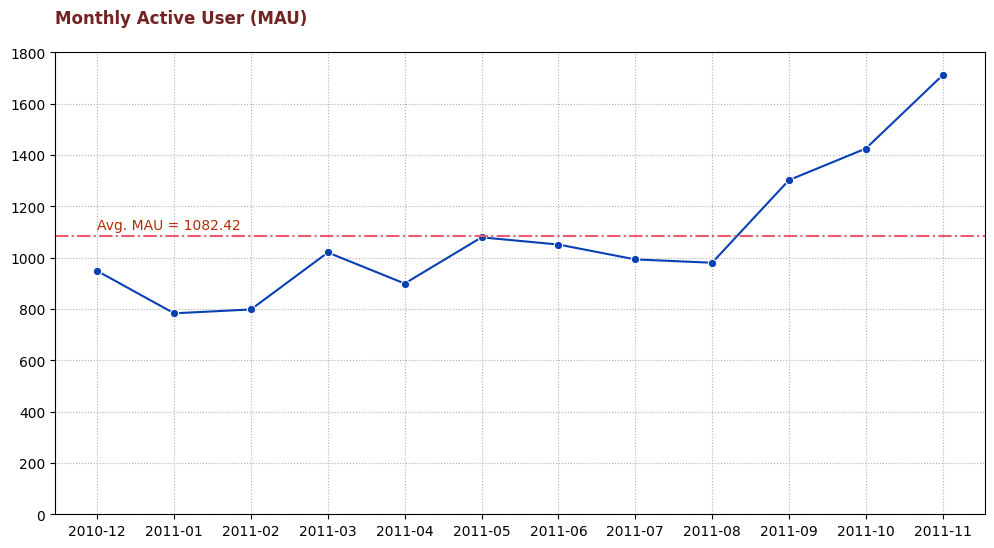

In [53]:
# datetime use lineplot
df_plot1['year_month'] = df_plot1['year_month'].astype(str)
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_plot1,
    x='year_month',
    y='customerCount',
    marker='o',
    color='#093FB4'
)
plt.title('Monthly Active User (MAU) \n',loc = 'left' , weight = 'bold', color = '#722323')
plt.xlabel('')
plt.ylabel('')
plt.ylim(0, 1800)
plt.grid(True, ls = ':')
plt.axhline(y=meanMAU, color='#EA5B6F', linestyle='-.')
plt.text(x = 0, y = meanMAU + 30, s = 'Avg. MAU = {}'.format(round(meanMAU, 2)), color = '#B12C00')
plt.show()



*   In general, the number of monthly customers of the company tends to increase.
*  On average, there are about 1082 customers transacting each month.
*  The fastest growth period was from August 2011 -> November 2011: increased from 980 customers to more than 1700 MAU (increase of 74.5%). It is very possible that during this period the company had a special promotion program.



#####❓2. How are the number of orders and total order amount each month?

In [54]:
df_plot2 = df.groupby(
    'year_month'
).agg(
    orderCount = ('invoice_num', 'nunique'),
    totalAmount = ('amount', 'sum')
).reset_index()
df_plot2['year_month'] = df_plot2['year_month'].astype(str)
df_plot2

,year_month,orderCount,totalAmount
0,2010-12,1708,590823.760
1,2011-01,1236,663815.700
2,2011-02,1202,457728.550
3,2011-03,1619,611036.910
4,2011-04,1384,512352.871
5,2011-05,1849,708938.040
6,2011-06,1707,714414.220
7,2011-07,1593,625943.541
8,2011-08,1544,674319.800
9,2011-09,2078,974236.392


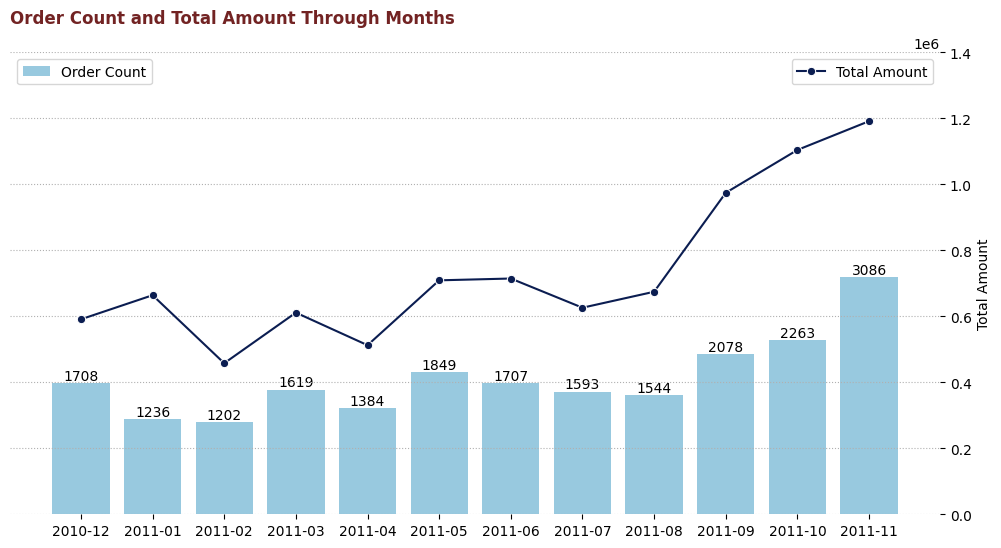

In [55]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_plot2,
    x='year_month',
    y='orderCount',
    color='#8CCDEB',
    label='Order Count'
)
plt.bar_label(ax.containers[0])
plt.title('Order Count and Total Amount Through Months \n',loc = 'left' , weight = 'bold', color = '#722323')
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.ylim(0, 6000)
ax.set_frame_on(False)
plt.legend(loc = 2) # loc = 'upper right'
plt.twinx()

ax2 = sns.lineplot(
    data=df_plot2,
    x='year_month',
    y='totalAmount',
    marker='o',
    color='#0B1D51',
    label = 'Total Amount'
)
plt.ylim(0, 1.4e6)
plt.ylabel('Total Amount')
ax2.set_frame_on(False)
plt.grid(True, ls = ':')

plt.show()



*   Not only the number of active user tends to increase, but the number of orders and revenue of the company also tends to increase every month, especially from August 2011 onwards.

=> The company's business situation is relatively good



In [56]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount,month,day,hour,year_month,week_days
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,1,8,2010-12,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,2010-12,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,1,8,2010-12,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,2010-12,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,2010-12,Wednesday


#####❓3. Analyze the number of customers by weekdays and by hour


In [57]:
df_plot3 = df.pivot_table(
    index = 'week_days',
    columns = 'hour',
    values = 'cust_id',
    aggfunc = 'nunique'
)
df_plot3 = df_plot3.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']]
df_plot3

hour,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
week_days,,,,,,,,,,,,,,,
Monday,NaN,4.0,78.0,225.0,286.0,315.0,407.0,402.0,338.0,293.0,195.0,103.0,10.0,NaN,NaN
Tuesday,NaN,5.0,107.0,266.0,355.0,375.0,444.0,402.0,331.0,334.0,185.0,130.0,3.0,NaN,NaN
Wednesday,NaN,4.0,98.0,286.0,363.0,351.0,467.0,414.0,362.0,353.0,256.0,98.0,NaN,1.0,1.0
Thursday,21.0,9.0,90.0,263.0,397.0,347.0,459.0,412.0,400.0,373.0,288.0,266.0,188.0,151.0,22.0
Friday,NaN,8.0,112.0,250.0,350.0,307.0,379.0,347.0,297.0,252.0,127.0,84.0,3.0,1.0,1.0
Sunday,NaN,NaN,NaN,5.0,170.0,300.0,350.0,290.0,252.0,259.0,89.0,NaN,NaN,NaN,NaN


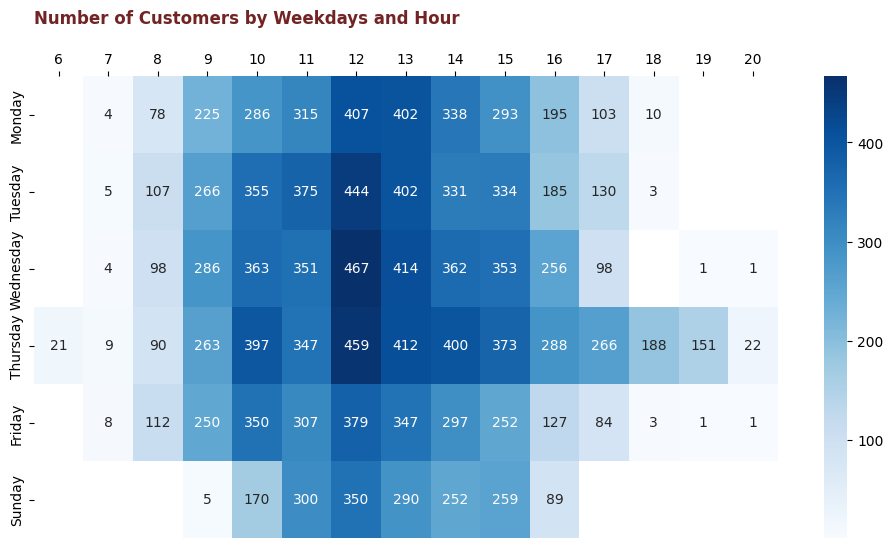

In [58]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(
    data = df_plot3,
    annot = True,
    cmap = 'Blues',
    fmt = '.0f'
)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.title('Number of Customers by Weekdays and Hour \n',loc = 'left' , weight = 'bold', color = '#722323')
plt.show()



*   This company has no customers make transaction on Saturdays.
*   Customers often make transaction at from 10am-3pm, strong trading from 12-1pm, at lunch break.
*   Higher demand on from Mon to Friday than Sunday.



#####❓4. Top 10 Contries bring most sales for the company?

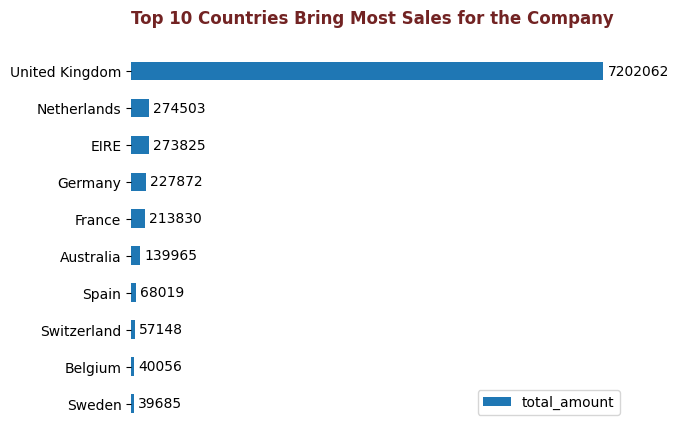

In [59]:
ax = df.groupby(
    'country'
).agg(total_amount = ('amount', 'sum')
).sort_values(
    by = 'total_amount', ascending=False
).head(10)[::-1].plot(
    kind = 'barh'
)
ax.bar_label(ax.containers[0], fmt = '%.0f', padding = 3)
plt.title('Top 10 Countries Bring Most Sales for the Company \n',loc = 'left' , weight = 'bold', color = '#722323')
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
ax.set_frame_on(False)
plt.show()



*   UK sales account for most of the company's sales. It's understandable because it's based in the UK.
*   In the top 10 countries, most of them are from Europe (except Australia)






#####❓5. Countries with most AOV - Average Order Value:
```python
'''
        Chỉ số AOV, viết tắt của Average Order Value, là một chỉ số tài chính đo lường giá trị trung bình mỗi khi khách hàng thực hiện một giao dịch với doanh nghiệp. Nó giúp các doanh nghiệp hiểu rõ hơn về giá trị mà mỗi đơn hàng mang lại và từ đó có những chiến lược cải thiện doanh thu và lợi nhuận thông qua việc tối ưu hóa các chiến thuật bán hàng.

        Nó được tính bằng công thức sau:
        
        AOV = [Tổng giá trị đơn hàng]/[Số lượng đơn hàng]
'''
```


In [60]:
df_plot5 = df.groupby('country').agg(totalsales = ('amount','sum'), totalorder = ('invoice_num','nunique')).reset_index()
df_plot5['AOV'] = df_plot5['totalsales'] / df_plot5['totalorder']
df_plot5 = df_plot5.sort_values(by = 'AOV', ascending = False)
df_plot5 = df_plot5.head(10)
df_plot5

,country,totalsales,totalorder,AOV
29,Singapore,33438.19,10,3343.819000
23,Netherlands,274503.12,98,2801.052245
0,Australia,139965.35,69,2028.483333
20,Lebanon,1693.88,1,1693.880000
19,Japan,39375.19,27,1458.340370
17,Israel,7449.13,6,1241.521667
4,Brazil,1143.60,1,1143.600000
33,USA,4274.66,4,1068.665000
27,RSA,1002.31,1,1002.310000
9,Denmark,18973.64,20,948.682000


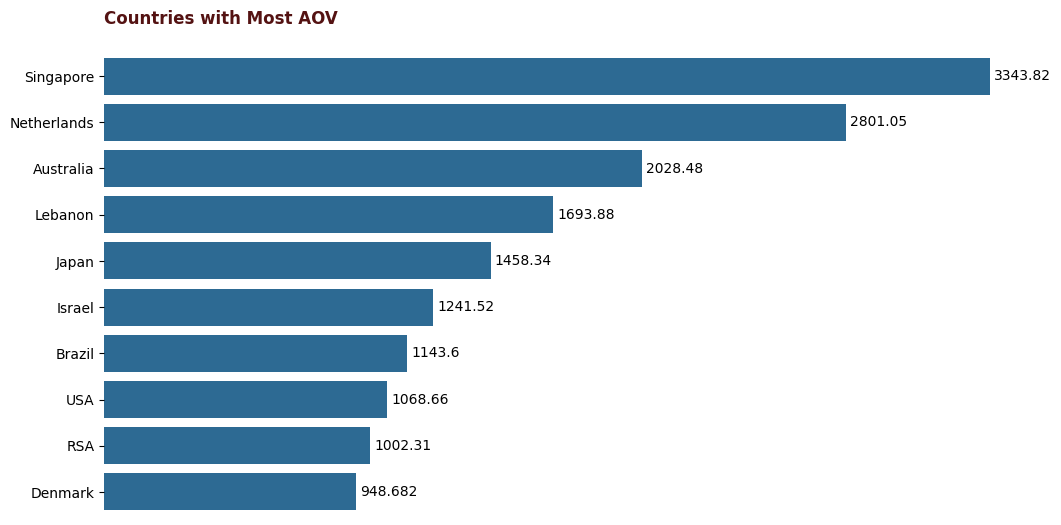

In [61]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data = df_plot5,
    x = 'AOV',
    y = 'country',
    color = '#1C6EA4'
)
ax.bar_label(ax.containers[0], padding=3)
plt.title('Countries with Most AOV \n',loc = 'left' , weight = 'bold', color = '#541212')
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
ax.set_frame_on(False)
plt.show()

* Although the UK has the highest sales volumn, the country with the highest AOV is from a Southeast Asian country, Singapore, followed by the Netherlands and Australia.

##### ❓6. How many new and old customers do you have each month?

In [62]:
newcusdf = df.groupby('cust_id').agg(firstTransDate = ('invoice_date', 'min')).reset_index()
df = df.merge(
    right = newcusdf,
    how = 'left',
    left_on = 'cust_id',
    right_on = 'cust_id',
)
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount,month,day,hour,year_month,week_days,firstTransDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,1,8,2010-12,Wednesday,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,2010-12,Wednesday,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,1,8,2010-12,Wednesday,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,2010-12,Wednesday,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,2010-12,Wednesday,2010-12-01 08:26:00


In [63]:
df['customer_type'] = np.where(df['invoice_date'] == df['firstTransDate'], 'new', 'old')
df_plot6 = df.groupby(
    ['year_month', 'customer_type']
).agg(
    customer_count = ('cust_id', 'nunique')
).reset_index()
df_plot6

,year_month,customer_type,customer_count
0,2010-12,new,948
1,2010-12,old,356
2,2011-01,new,421
3,2011-01,old,464
4,2011-02,new,380
5,2011-02,old,494
6,2011-03,new,440
7,2011-03,old,666
8,2011-04,new,299
9,2011-04,old,666


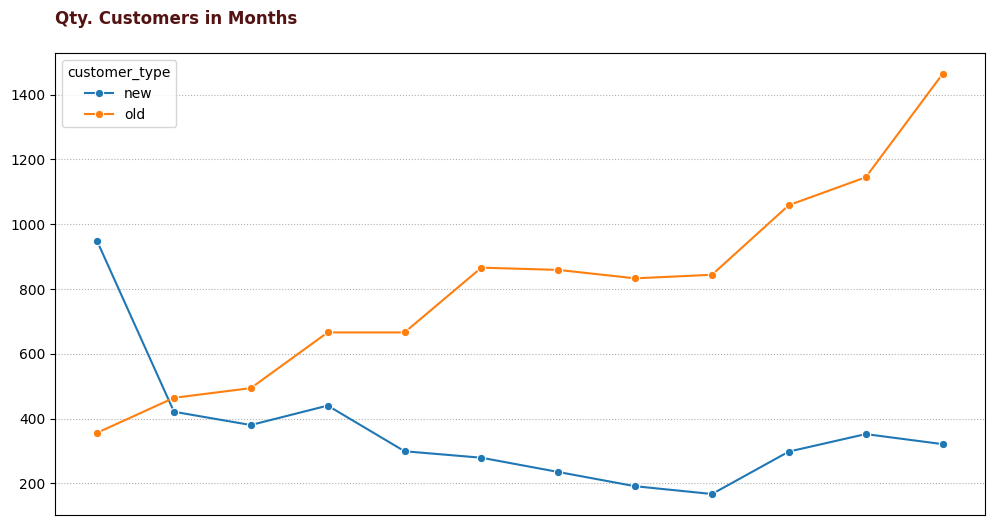

In [64]:
df_plot6['year_month'] = df_plot6['year_month'].astype(str)
plt.figure(figsize=(12, 6))
sns.lineplot(
    data = df_plot6,
    x = 'year_month',
    y = 'customer_count',
    hue = 'customer_type',
    marker = 'o'
)
plt.title('Qty. Customers in Months \n',loc = 'left' , weight = 'bold', color = '#541212')
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.grid(True, ls = ':')
plt.show()

* Over time, the good news is that the number of old customers of this company returning is good => The company is doing a good job of retaining customers.

#####❓7. Considering the new customers of December 2010, what is the average transaction value of these customers in each month when they return?


In [65]:
newcusID = df[(df['customer_type'] == 'new') & (df['year_month'] == '2010-12')]['cust_id'].unique()
newcustransdf = df[df['cust_id'].isin(newcusID)]
newcustransdf

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount,month,day,hour,year_month,week_days,firstTransDate,customer_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,1,8,2010-12,Wednesday,2010-12-01 08:26:00,new
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,2010-12,Wednesday,2010-12-01 08:26:00,new
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,1,8,2010-12,Wednesday,2010-12-01 08:26:00,new
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,2010-12,Wednesday,2010-12-01 08:26:00,new
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,2010-12,Wednesday,2010-12-01 08:26:00,new
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389002,C579882,23245,SET OF 3 REGENCY CAKE TINS,1,2011-11-30 17:28:00,4.95,13050.0,United Kingdom,4.95,11,30,17,2011-11,Wednesday,2010-12-08 09:30:00,old
389005,C579884,D,Discount,1,2011-11-30 17:34:00,20.53,14527.0,United Kingdom,20.53,11,30,17,2011-11,Wednesday,2010-12-01 09:41:00,old
389165,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,1,2011-11-30 17:42:00,1.25,16717.0,United Kingdom,1.25,11,30,17,2011-11,Wednesday,2010-12-08 16:48:00,old
389166,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1,2011-11-30 17:42:00,7.95,16717.0,United Kingdom,7.95,11,30,17,2011-11,Wednesday,2010-12-08 16:48:00,old


In [66]:
df_plot7 = newcustransdf.groupby(
    ['year_month', 'cust_id']
).agg(totalamount = ('amount', 'sum')).reset_index().groupby(
    'year_month'
).agg(avg_amount = ('totalamount', 'mean')).reset_index()
df_plot7

,year_month,avg_amount
0,2010-12,623.231814
1,2011-01,800.191823
2,2011-02,772.386309
3,2011-03,879.728256
4,2011-04,625.022170
5,2011-05,967.765452
6,2011-06,911.632500
7,2011-07,976.884673
8,2011-08,1075.729673
9,2011-09,1323.478663


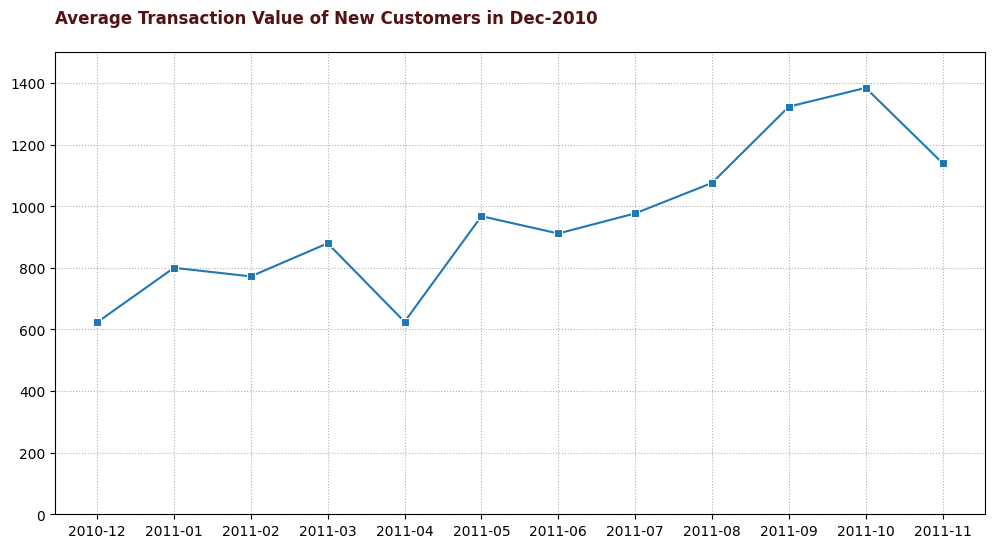

In [67]:
df_plot7['year_month'] = df_plot7['year_month'].astype(str)
plt.figure(figsize=(12, 6))
sns.lineplot(
    data = df_plot7,
    x = 'year_month',
    y = 'avg_amount',
    marker = 's'
)
plt.title('Average Transaction Value of New Customers in Dec-2010 \n',loc = 'left' , weight = 'bold', color = '#541212')
plt.xlabel('')
plt.ylabel('')
plt.ylim(0, 1500)
plt.grid(True, ls = ':')
plt.show()

 * Customers who returned in December 2010 tend to spend more money on this  company.



#### ❓8. `**Customer Segmentation:**`
*File tham khảo: `Customer segment map.xlsx`*

Chúng ta đều biết, trong công ty không phải khách hàng nào cũng tốt và mang lại giá trị cao cho công ty. Có nhóm khách hàng thực sự trung thành với sản phẩm của công ty và ngược lại một số nhóm khách hàng mang lại giá trị thấp.

Vì vậy để tối ưu hóa chiến lược chăm sóc và marketing, nhằm giảm thiểu chi phí chăm sóc khách hàng thì việc phân khúc khách hàng rất quan trọng. Câu hỏi đặt ra là "làm sao để làm được điều này?".

Trong bài này, mình sẽ phân khúc khách hàng dựa vào 2 chỉ số sau:

   + **Recency - Gần nhất**: Recency là chỉ số đo lường khoảng thời gian kể từ lần cuối cùng khách hàng tương tác với sản phẩm hoặc dịch vụ của bạn. Câu hỏi chúng ta cần đặt ra là: `"Lần cuối cùng khách hàng này mua hàng của chúng ta đến hiện tại là mấy ngày?"`

      + Khách hàng mới mua gần đây: Đây là những người đã mua sản phẩm hoặc dịch vụ gần đây nhất. Họ có thể đang cảm thấy hài lòng hoặc có nhu cầu cao.
      + Khách hàng mua từ lâu: Họ đã không mua hàng trong một thời gian dài, có thể họ đã quên sản phẩm của chúng ta hoặc đã tìm thấy sự lựa chọn khác.

   + **Frequency - Tần suất**: Frequency đo lường số lần khách hàng mua hàng trong một khoảng thời gian nhất định. Câu hỏi cần trả lời là: `"Khách hàng này đã mua hàng bao nhiêu lần?"`

      + Khách hàng thường xuyên: Họ mua hàng nhiều lần, cho thấy họ trung thành và có thể là những người yêu thích sản phẩm.
      + Khách hàng ít mua: Họ ít mua hàng, có thể họ chỉ mua sản phẩm khi cần thiết hoặc có dịp đặc biệt.


![image.png](imgs/img1.png)

Bạn đã hiểu các chỉ số để phân khúc khách hàng rồi, và dưới đây là các bước để có thể hoàn thành nó:
   + B1: Group by theo từng `cust_id` và tính các chỉ số `frequency` và `ngày giao dịch cuối cùng` của từng khách hàng.
   + B2: Với mỗi khách hàng, tính chỉ số: \
         `recency` = `ngày giao dịch cuối cùng của transaction data` - `ngày giao dịch cuối cùng`

   + B3: Tính điểm cho mỗi chỉ số `recency` và `frequency` cho mỗi khách hàng theo quy tắc như sau:
      + Recency:
         + 1đ: >48
         + 2đ: 15-48
         + 3đ: <15

      + Frequency:
         + 1đ: 1
         + 2đ: 2-5
         + 3đ: >5

   + B4: Mapping các phân khúc khách hàng theo bản đồ như sau:
   
![image.png](imgs/img2.png)

   + B5: Phân tích các loại khách hàng, phần này không giới hạn các ý tưởng phân tích của các bạn. Có một số gợi ý phân tích như sau:
      + Số lượng khách hàng trong mỗi phân khúc đang như thế nào?
      + Tỉ lệ % doanh thu từ các phân khúc khách hàng đang như thế nào?
      + ...
      

In [68]:
maxtransday = max(df['invoice_date'])
rfdf = df.groupby(
    'cust_id'
).agg(
    last_trans_date = ('invoice_date', 'max'),
    frequency = ('invoice_num', 'nunique'),
).reset_index()
rfdf['recency'] = (pd.to_datetime(maxtransday) - pd.to_datetime(rfdf['last_trans_date'])).dt.days
rfdf.head()

,cust_id,last_trans_date,frequency,recency
0,12346.0,2011-01-18 10:17:00,2,316
1,12347.0,2011-10-31 12:25:00,6,30
2,12348.0,2011-09-25 13:13:00,4,66
3,12349.0,2011-11-21 09:51:00,1,9
4,12350.0,2011-02-02 16:01:00,1,301


In [69]:
rfdf.describe()

,cust_id,frequency,recency
count,4331.000000,4331.000000,4331.000000
mean,15301.893789,4.910875,90.252828
std,1721.496466,9.025901,99.388939
min,12346.000000,1.000000,0.000000
25%,13815.500000,1.000000,15.000000
50%,15301.000000,3.000000,48.000000
75%,16780.500000,5.000000,144.000000
max,18287.000000,238.000000,364.000000


In [70]:
rfdf['recency_score'] = np.where(rfdf['recency'] > 48, 1, np.where(rfdf['recency'] >= 15, 2, 3))
rfdf['frequency_score'] = np.where(rfdf['frequency'] == 1, 1, np.where(rfdf['frequency'] <= 5, 2, 3))
rfdf.head()

,cust_id,last_trans_date,frequency,recency,recency_score,frequency_score
0,12346.0,2011-01-18 10:17:00,2,316,1,2
1,12347.0,2011-10-31 12:25:00,6,30,2,3
2,12348.0,2011-09-25 13:13:00,4,66,1,2
3,12349.0,2011-11-21 09:51:00,1,9,3,1
4,12350.0,2011-02-02 16:01:00,1,301,1,1


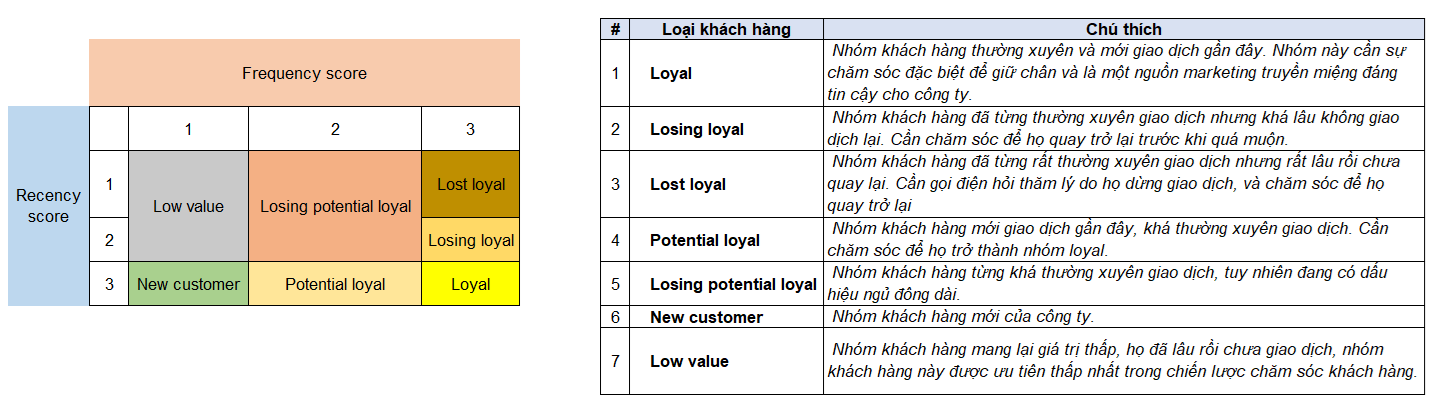

In [71]:
rfdf.loc[(rfdf['frequency_score']==3)&(rfdf['recency_score']==3), 'customer_rf_type'] = 'Loyal'
rfdf.loc[(rfdf['frequency_score']==2)&(rfdf['recency_score']==3), 'customer_rf_type'] = 'Potential loyal'
rfdf.loc[(rfdf['frequency_score']==1)&(rfdf['recency_score']==3), 'customer_rf_type'] = 'New customer'
rfdf.loc[(rfdf['frequency_score']==3)&(rfdf['recency_score']==2), 'customer_rf_type'] = 'Losing loyal'
rfdf.loc[(rfdf['frequency_score']==3)&(rfdf['recency_score']==1), 'customer_rf_type'] = 'Lost loyal'
rfdf.loc[(rfdf['frequency_score']==2)&(rfdf['recency_score']<=2), 'customer_rf_type'] = 'Losing potential loyal'
rfdf.loc[(rfdf['frequency_score']==1)&(rfdf['recency_score']<=2), 'customer_rf_type'] = 'Low value'
rfdf.head()

,cust_id,last_trans_date,frequency,recency,recency_score,frequency_score,customer_rf_type
0,12346.0,2011-01-18 10:17:00,2,316,1,2,Losing potential loyal
1,12347.0,2011-10-31 12:25:00,6,30,2,3,Losing loyal
2,12348.0,2011-09-25 13:13:00,4,66,1,2,Losing potential loyal
3,12349.0,2011-11-21 09:51:00,1,9,3,1,New customer
4,12350.0,2011-02-02 16:01:00,1,301,1,1,Low value


In [72]:
dfplot8 = rfdf.groupby(
    'customer_rf_type'
).agg(
    customers_count = ('cust_id', 'count')
).reset_index()
dfplot8 = dfplot8.sort_values(by='customers_count', ascending=False)
dfplot8

,customer_rf_type,customers_count
1,Losing potential loyal,1506
3,Low value,1241
4,Loyal,524
6,Potential loyal,434
0,Losing loyal,331
2,Lost loyal,180
5,New customer,115


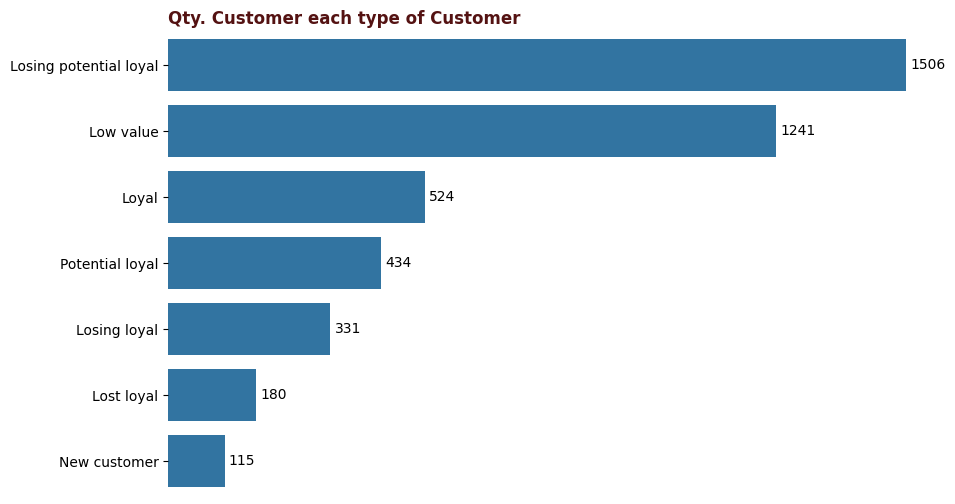

In [73]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    dfplot8,
    x = 'customers_count',
    y = 'customer_rf_type'
)
ax.bar_label(ax.containers[0], padding = 3)
plt.title('Qty. Customer each type of Customer', color = '#541212', weight = 'bold', loc = 'left')
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
ax.set_frame_on(False)
plt.show()

In [75]:
df = pd.merge(
    left = df,
    right = rfdf[['cust_id','customer_rf_type']],
    on = 'cust_id',
    how = 'left'
)
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount,month,day,hour,year_month,week_days,firstTransDate,customer_type,customer_rf_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,1,8,2010-12,Wednesday,2010-12-01 08:26:00,new,Lost loyal
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,2010-12,Wednesday,2010-12-01 08:26:00,new,Lost loyal
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,1,8,2010-12,Wednesday,2010-12-01 08:26:00,new,Lost loyal
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,2010-12,Wednesday,2010-12-01 08:26:00,new,Lost loyal
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,2010-12,Wednesday,2010-12-01 08:26:00,new,Lost loyal


In [77]:
dfplot = df.groupby(
    'customer_rf_type'
).agg(
    customerstotalamount = ('amount', 'sum')
).reset_index()
dfplot.sort_values(by='customerstotalamount', ascending=False)
dfplot

,customer_rf_type,customerstotalamount
0,Losing loyal,1633904.750
1,Losing potential loyal,1711735.103
2,Lost loyal,432793.240
3,Low value,435235.781
4,Loyal,4101433.370
5,New customer,34022.270
6,Potential loyal,479746.280


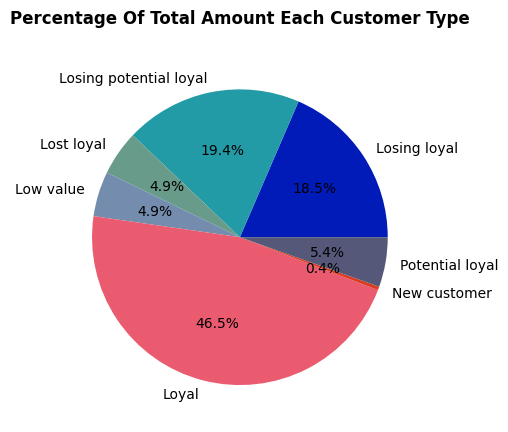

In [82]:
ax = plt.pie(
    x = dfplot['customerstotalamount'],
    autopct = '%1.1f%%',
    labels = dfplot['customer_rf_type'],
    colors = ['#001BB7', '#239BA7', '#689B8A', '#748DAE', '#EA5B6F', '#DC3C22', '#555879']
)
plt.title('Percentage of total amount each customer type\n'.title(), weight='bold')
plt.show()

#####+ Doanh số các khách hàng loyal và Potential loyal của công ty đang chiếm ~90% doanh số của công ty